# Clasification

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split

(1000, 2) (1000,)
(800, 2) (800,) (200, 2) (200,)


<ipython-input-5-da9b60c5350a>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_train[:, 0], X_train[:, 1], c='b', marker='x', edgecolors='k', label='Train data')
<ipython-input-5-da9b60c5350a>:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axes[1].scatter(X_test[:, 0], X_test[:, 1], c='r', marker='x', edgecolors='k', label='Test data')


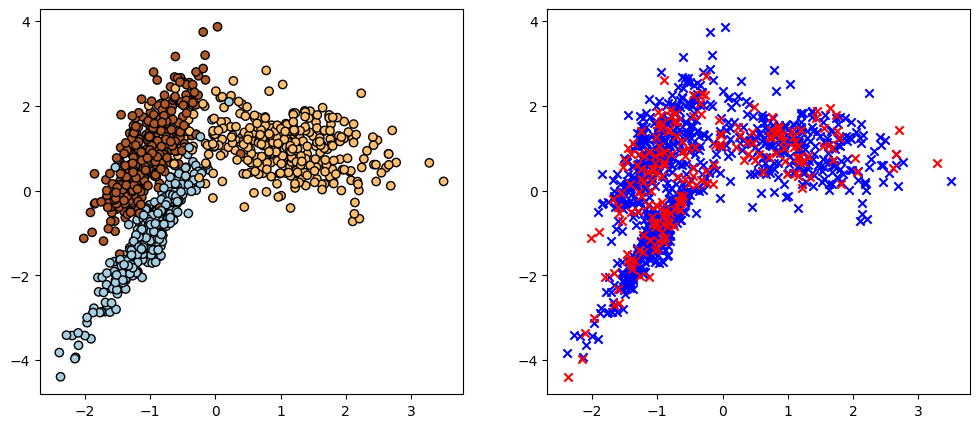

In [ ]:
# we create 100 separable points
X, y = make_classification(n_samples = 1000, n_features=2, n_classes = 3, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Plot train data
_, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', label='General data', cmap = 'Paired')
axes[1].scatter(X_train[:, 0], X_train[:, 1], c='b', marker='x', edgecolors='k', label='Train data')
axes[1].scatter(X_test[:, 0], X_test[:, 1], c='r', marker='x', edgecolors='k', label='Test data')




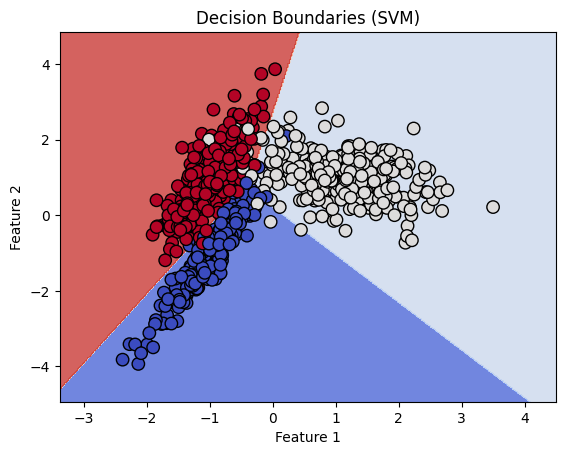

In [ ]:
'''
    --> Paste your plot_2d_decision_boundaries function here!
'''
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_decision_boundaries(X, y, classifier, title="Decision Boundaries", xlabel="Feature 1", ylabel="Feature 2"):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the labels for each point in the mesh
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, cmap=plt.cm.coolwarm)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Uso de la función con tu conjunto de datos de entrenamiento y un clasificador (por ejemplo, SVM)
from sklearn.svm import SVC

# Crear y entrenar un clasificador (SVM en este caso)
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

# Visualizar las fronteras de decisión
plot_2d_decision_boundaries(X_train, y_train, classifier, title="Decision Boundaries (SVM)")


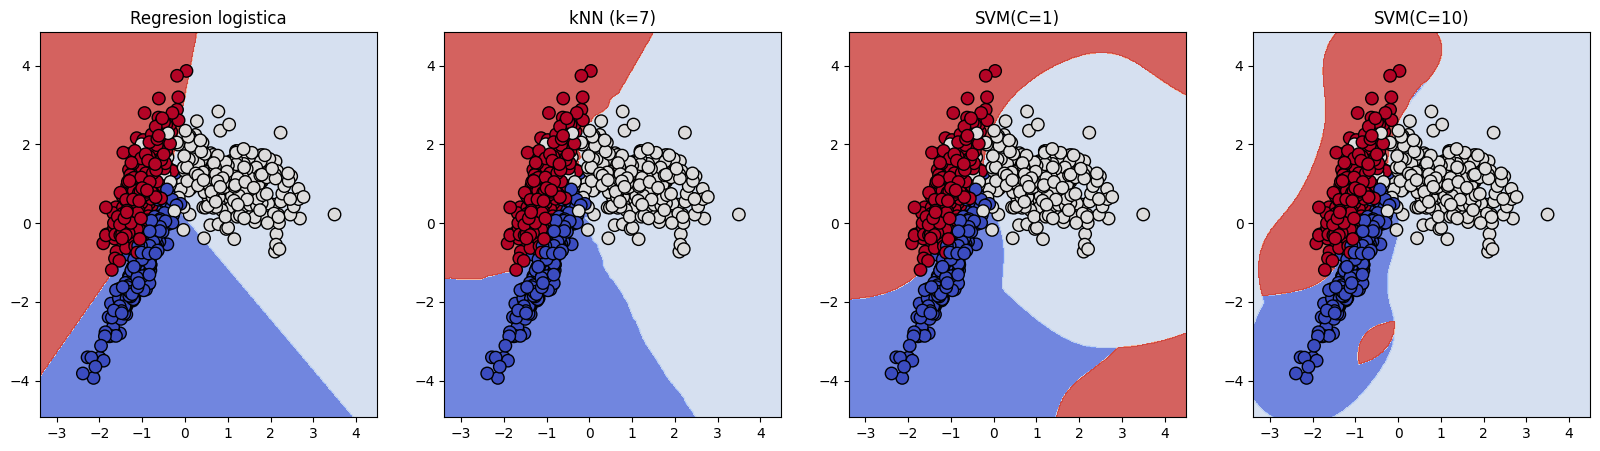

In [ ]:
models = [ LogisticRegression() , kNN(n_neighbors=7) , SVC(kernel='rbf', C=1), SVC(kernel='rbf', C=10) ]

names = ["Regresion logistica", "kNN (k=7)", "SVM(C=1)", "SVM(C=10)"]

_, axes = plt.subplots(1, len(names), figsize = (5*len(names) , 5))

predictions = {}

# fit the model

for clf, name, ax in zip(models, names, axes):
    clf.fit(X_train, y_train)
    predictions[name] = clf.predict(X_test)

    # Plot decision boundaries
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=80, cmap=plt.cm.coolwarm)

    ax.set_title(name)
    # Plot everything

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.945  	   0.945  	   0.945  	   0.945  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.935  	   0.935  	   0.935  	   0.935  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.945  	   0.945  	   0.945  	   0.945  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.950  	   0.950  	   0.950  	   0.950  	


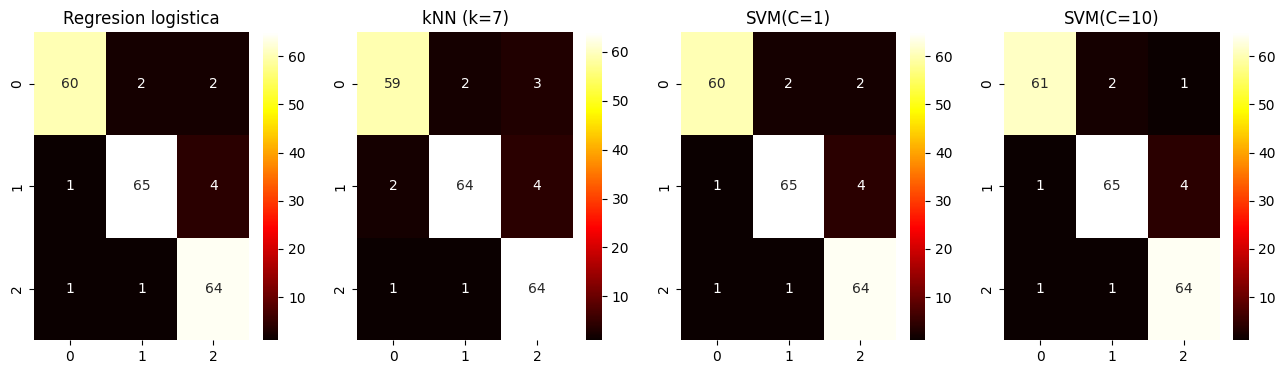

In [ ]:

_, axes = plt.subplots(1, len(names) , figsize = (4*len(names),4))

# Compute metrics - plot confusion matrix
for name, ax in zip(names, axes) :
  print ("########----- Results for {0} -----########".format( _ ))
  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name], average = "micro")
  f1 = f1_score(y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title(name )

########----- Results for Regresion logistica -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.945  	   0.945  	   0.945  	   0.945  	
########----- Results for kNN (k=7) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.935  	   0.935  	   0.935  	   0.935  	
########----- Results for SVM(C=1) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.945  	   0.945  	   0.945  	   0.945  	
########----- Results for SVM(C=10) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.950  	   0.950  	   0.950  	   0.950  	


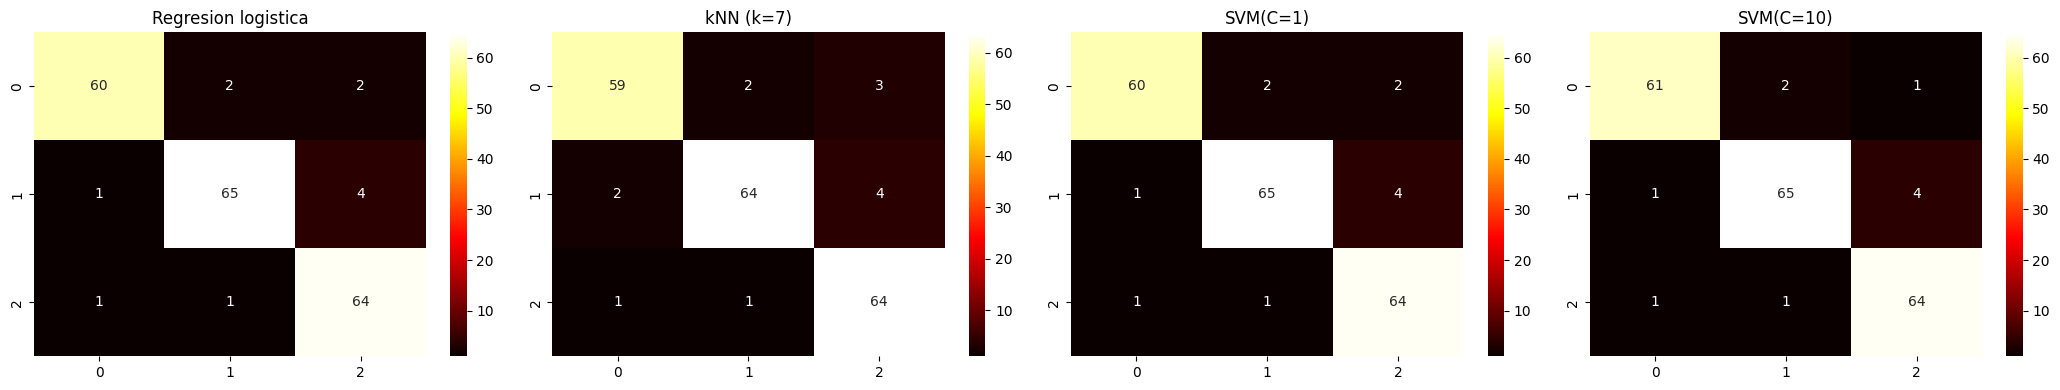

In [ ]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

_, axes = plt.subplots(1, len(names), figsize=(21, 4))

# Compute metrics - plot confusion matrix
for clf, name, ax in zip(models, names, axes):
    print("########----- Results for {0} -----########".format(name))

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="micro")
    recall = recall_score(y_test, y_pred, average="micro")
    f1 = f1_score(y_test, y_pred, average="micro")
    cm = confusion_matrix(y_test, y_pred)

    # Print metrics
    print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
    print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))

    # Plot confusion matrix
    sns.heatmap(cm, cmap="hot", annot=True, ax=ax)
    ax.set_title(name)

plt.tight_layout()
plt.show()


## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


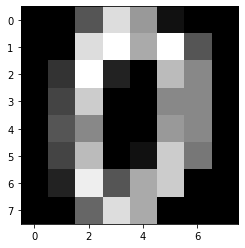

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

(1000, 1) (1000,) (800, 1) (800,) (200, 1) (200,)


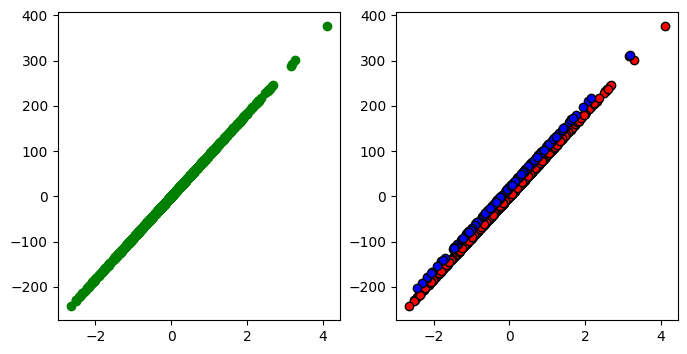

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = 1 , noise = 0.2 , random_state = 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)


np.random.seed(0)
y_test = y_test + np.random.normal(len(y_test)) * 0.1

print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape )
# Plot train / test data
_, axes = plt.subplots (1,2, figsize=(8,4))
axes[0].scatter(X,y, c='g')
axes[1].scatter(X_train, y_train, edgecolors='k', c='r')
axes[1].scatter(X_test, y_test, edgecolors='k', c='b')

In [ ]:
# Train a linear regression
linear_regresion = LinearRegression()
linear_regresion.fit(X_train, y_train)


LinearRegression()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE
predictions = linear_regresion.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"MAE: {mae}")
print(f"MAE: {mse}")


MAE: 20.176726817798013
MAE: 407.11079888979936
